In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

### Сгенерируем выборку с классами, расположенными в виде "луны" и попробуем построить решающее дерево


In [2]:
from sklearn.datasets import make_moons
dataset = make_moons(n_samples=1000,
                     noise=0.5,
                     random_state=0)
dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))),
                       columns=["x1", "x2", "y"])
dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


#### Изобразим данные

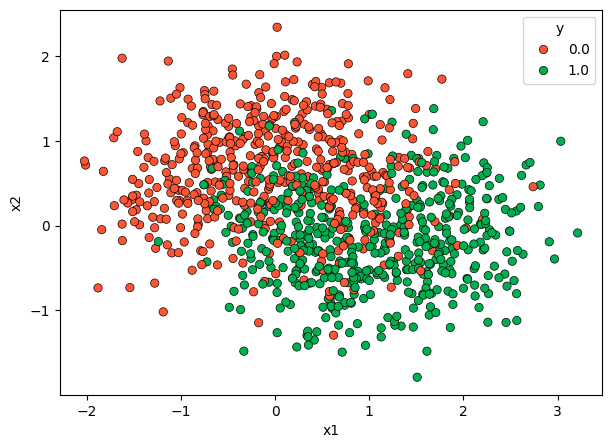

In [3]:
fig = plt.figure()
fig.set_size_inches(7, 5)
sns.scatterplot(x="x1",
                y="x2",
                hue="y",
                edgecolor="k",
                palette=["#FF5533", "#00B050"],
                data=dataset)
plt.show()

### Построим модель

In [5]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
X = dataset.drop("y", axis=1)
y = dataset["y"]
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

DecisionTreeClassifier()

#### Замерим качество

In [6]:
decision_tree.score(X, y)

1.0

#### Закрасим границы признакового пространства

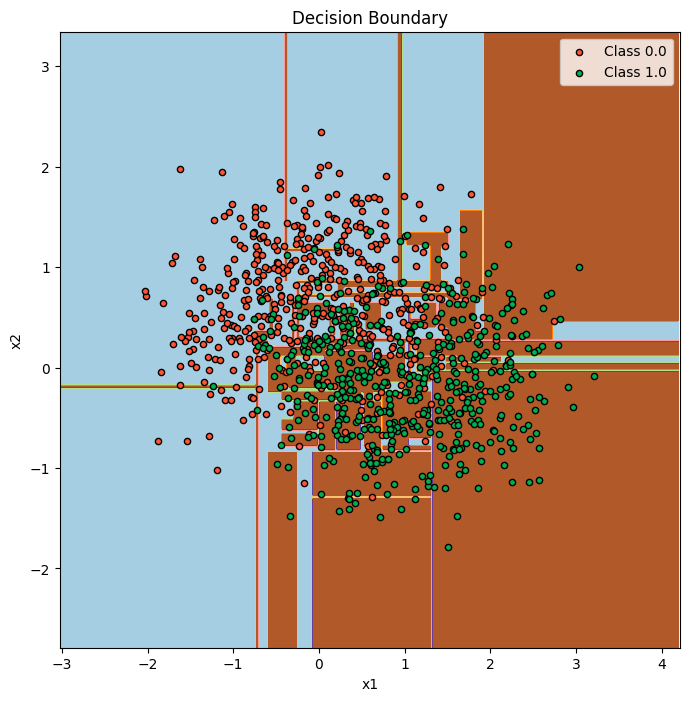

In [9]:
fig = plt.figure()
fig.set_size_inches(8, 8)

### Вычислим границы признакового пространства

pixel_step = 0.02
x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.show()

#### Проделаем все тоже самое, но только с половиной данных

In [10]:
X_2, y_2 = X[:500], y[:500]

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_2, y_2)

DecisionTreeClassifier()

In [12]:
decision_tree.score(X_2,y_2)

1.0

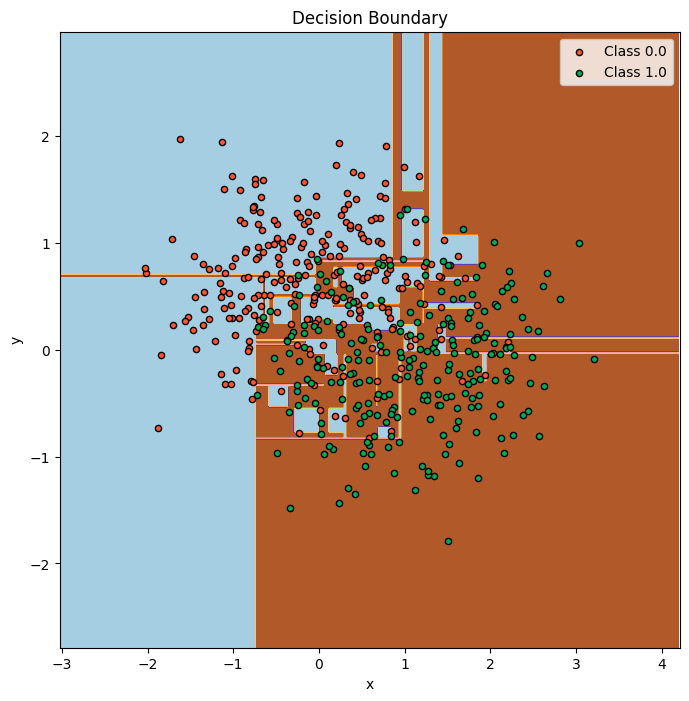

In [18]:
fig = plt.figure()
fig.set_size_inches(8,8)
### Вычислим границы признакового пространства

pixel_step = 0.02
x1_min, x1_max = X_2.values[:, 0].min() - 1, X_2.values[:, 0].max() + 1
x2_min, x2_max = X_2.values[:, 1].min() - 1, X_2.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y_2 == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")
plt.show()

#### Поищем оптимальные параметры модели

Accuracy равно: 0.84


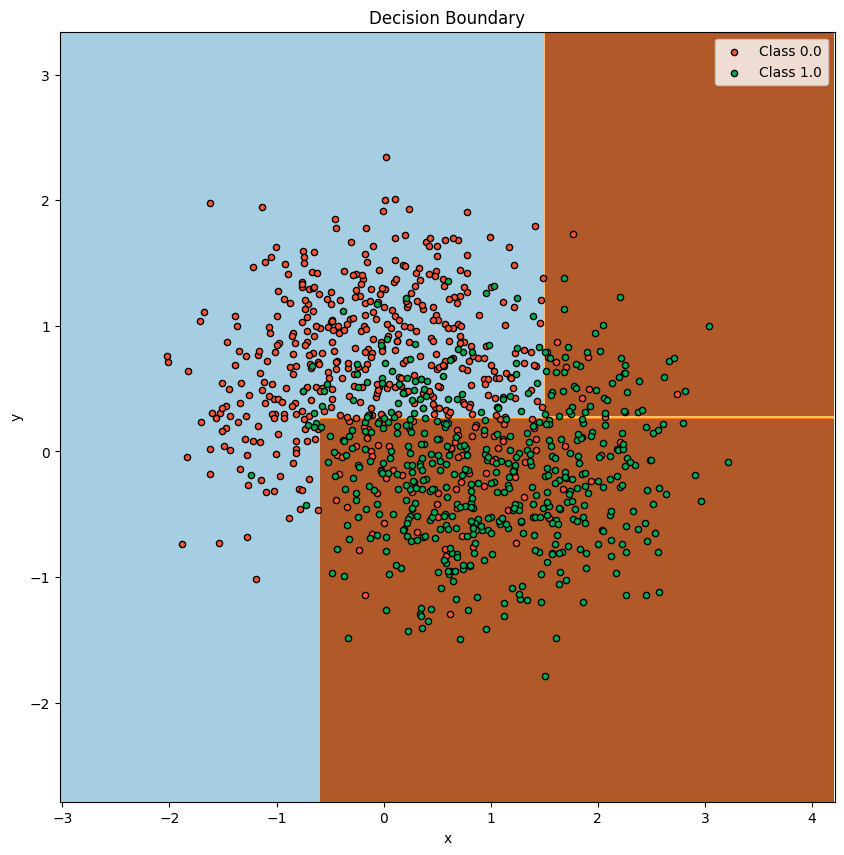

In [23]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X, y)

print(f"Accuracy равно: {np.round(decision_tree.score(X, y),2)}")

fig = plt.figure()
fig.set_size_inches(10, 10)

### Вычислим границы признакового пространства

pixel_step = 0.02
x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")
plt.show()

#### Изобразим дерево в виде графа

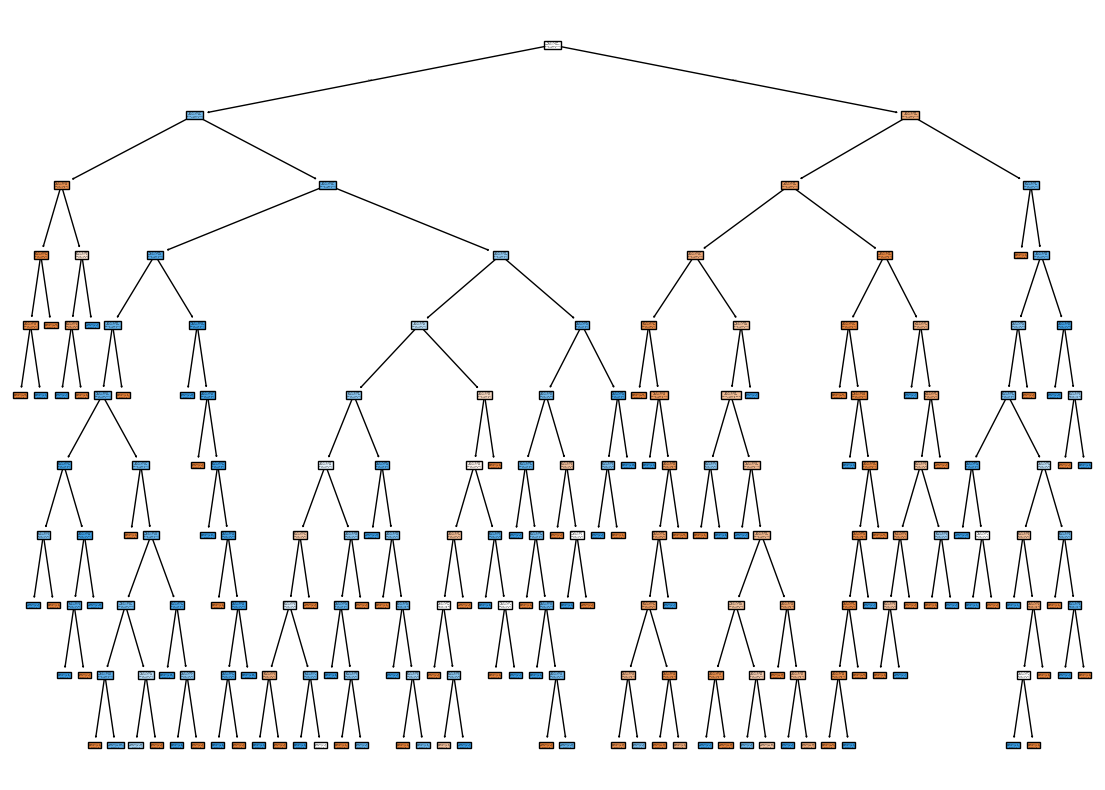

In [24]:
from sklearn import tree
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X, y)

fig = plt.figure()
fig.set_size_inches(14, 10)
tree.plot_tree(decision_tree,
               feature_names=X.columns,
               class_names=decision_tree.classes_.astype(int).astype(str),
               filled=True
           )
plt.show()

#### Позамеряем качество модели с подобранными параметрами на обучающей и тестовых выборках

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=0.2)

decision_tree = DecisionTreeClassifier(max_depth=5 ,min_samples_leaf=5)

decision_tree.fit(X_train, y_train)

print(f"Accuracy равно на трейне: {np.round(decision_tree.score(X_train, y_train),4)}")
print(f"Accuracy равно на тесте: {np.round(decision_tree.score(X_test, y_test),4)}")

Accuracy равно на трейне: 0.8438
Accuracy равно на тесте: 0.8
